In [14]:
import sys
sys.path.append('C:/Users/shjo/Bridge/JNUpack/mySO_src/libs/')
import matplotlib as mpl
# mpl.use('agg')
from myPlot import  figmaster,myClrbr
from myTools import myInfo
import matplotlib.path as mpath
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cf
from eofs.xarray import Eof
import numpy as np
import xarray as xr
import pickle
from myTrend import myfitting2d_sttcs,myfitting1d_sttcs
from myPlot import  figmaster,myClrbr, dta_colr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata 
import warnings
import colormaps as cmaps
warnings.filterwarnings('ignore')

pthmd='J:/tmp_proc/Models/'
pthob='J:/tmp_proc/Obs/'

wpth='C:/Users/shjo/OneDrive/mySO/Sections/Mean_states/'

lat_rng=[-67,-45]; lon_rng=[139,141]; depth_rng=[0,900]

t_rng=[1993, 2017]
varnm='temp'
fig_bool=1



In [15]:
### Preparation ============================================================
time_rng=[str(t_rng[0])+'-01',str(t_rng[-1])+'-12']
tmp_sv_nm=str(lon_rng[0])+'E'+str(lon_rng[-1])+'E'+'_'+str(lat_rng[0])+'S'+str(lat_rng[-1])+'S'
tmp_sv_nm=tmp_sv_nm.replace('-','')
# wpth=wpth+varnm+'_'+tmp_sv_nm+'/'

wpth_re=wpth+varnm+'_'+str(t_rng[0])+'_'+str(t_rng[-1])+'_'+tmp_sv_nm+'/'
try :
    os.mkdir(wpth_re)
except:
    pass
# loc=sys._getframe().f_code.co_filename
# myInfo(loc,wpth_re)

In [16]:
# myRnly=[pthrn+i for i in os.listdir(pthrn) if i.endswith('.nc')]
myMdls=[pthmd+i for i in os.listdir(pthmd) if i.endswith('.nc')]
myObsv=[pthob+i for i in os.listdir(pthob) if i.endswith('.nc')]

myDATA=myMdls+myObsv

if t_rng[0]<1992:
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myECCO')]
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myISAS')]
    myDATA=[i for i in myDATA if not i.split('/')[-1].startswith('myARMOR3D')]

plt.rcParams["font.family"] = 'Arial'

In [17]:
myN=20
mylim=[-2.,18]
mydepth=[-250, -500, -1000, -1500,-2000]
mydepth=[-250, -500, -800]

mylevels2=[-0.001,1.5,4.5,8,11]

mySetting={
    'figsize': '',
    'mylabel': '',
    'Label_size':12,
    'title_loc':'right',
    'fontParams':'Arial',
    'wpth':wpth}
F=figmaster(mySetting)

In [18]:
def Vertical_data_drift03_(latR_m,depthR_m,dataR,mydepth,CMAP,myLevels1,myLevels2,dt_nm,snm):
    Label_size=12
    xtick_location = np.around(np.linspace(latR_m[0,0], latR_m[-1,-1],5))
    xtick_location = np.around(np.arange(latR_m[0,0]-1,latR_m[-1,-1]+1,5)+0.75)
    xtick_labels = [f'{-ii:2.0f}S' for ii in xtick_location]
    # xtick_labels = [str(-ii)+'S' for ii in xtick_location]
    ytick_location= mydepth
    ytick_labels  = [f'{-ii:2.0f}m' for ii in ytick_location]
    # Figures
    fig, axs = plt.subplots(1,1,figsize=(8,4),
                            sharex=True,gridspec_kw={'height_ratios': [1],'wspace':0, 'hspace':0.05},dpi=200)
    # im1=axs.pcolor(latR_m,depthR_m,dataR,cmap=CMAP,vmin=data_lim[0],vmax=data_lim[-1])
    axs.set_title(dt_nm,loc='right',fontdict={'fontsize':Label_size+4,'fontweight':'regular'})
    axs.axvline(x=-60,ls='--',color='k')
    axs.axvline(x=-50,ls='--',color='k')
    
    im1=axs.contourf(latR_m,depthR_m,dataR,cmap=CMAP,levels=myLevels1)
    # axs.clabel(im1, inline=1, fontsize=14)
    axs.tick_params(axis='x', direction='in', length=4.5, pad=8, labelsize=Label_size, labelcolor='k', top=True)
    axs.tick_params(axis='y', direction='in', length=4.5, pad=8, labelsize=Label_size, color='k',right=True)
    # axs.set_ylim(-NC['Tcline'].values[0],0) 
    # plt.grid(color='grey', linestyle='-.', linewidth=1,axis='y',alpha=.7)
    axs.set_xlim(latR_m[0,0],latR_m[-1,-1])
    im0=axs.contour(latR_m,depthR_m,dataR,\
        colors='k',levels=myLevels2,linestyle='-')
    axs.clabel(im0, inline=1, fontsize=10)
    axs.set_xticks(ticks=xtick_location)
    axs.set_xticklabels(xtick_labels, rotation=0, fontsize=Label_size, alpha=1.)
    axs.set_yticks(ticks=ytick_location)
    axs.set_yticklabels(ytick_labels, rotation=0, fontsize=Label_size, alpha=1.)
    axs.set_facecolor(color='#dddddd')
    divider = make_axes_locatable(axs)
    cax = divider.append_axes("bottom", size="7%", pad=.35)
    cax.tick_params(labelsize=Label_size)
    cax.set_ylabel('',{'fontsize':Label_size,'fontweight':'bold','style':'italic'})
    h = fig.colorbar(im1, ax=axs,label='',cax=cax,orientation="horizontal",extend='both',aspect=50)
    if 0:
        # plt.savefig('',facecolor='none',edgecolor='none',bbox_inches='tight',transparent=True)
        plt.savefig(snm,bbox_inches='tight')
    plt.show()

!!! Open: J:/tmp_proc/Models/myECCO_199201_201712_tsh.nc !!!


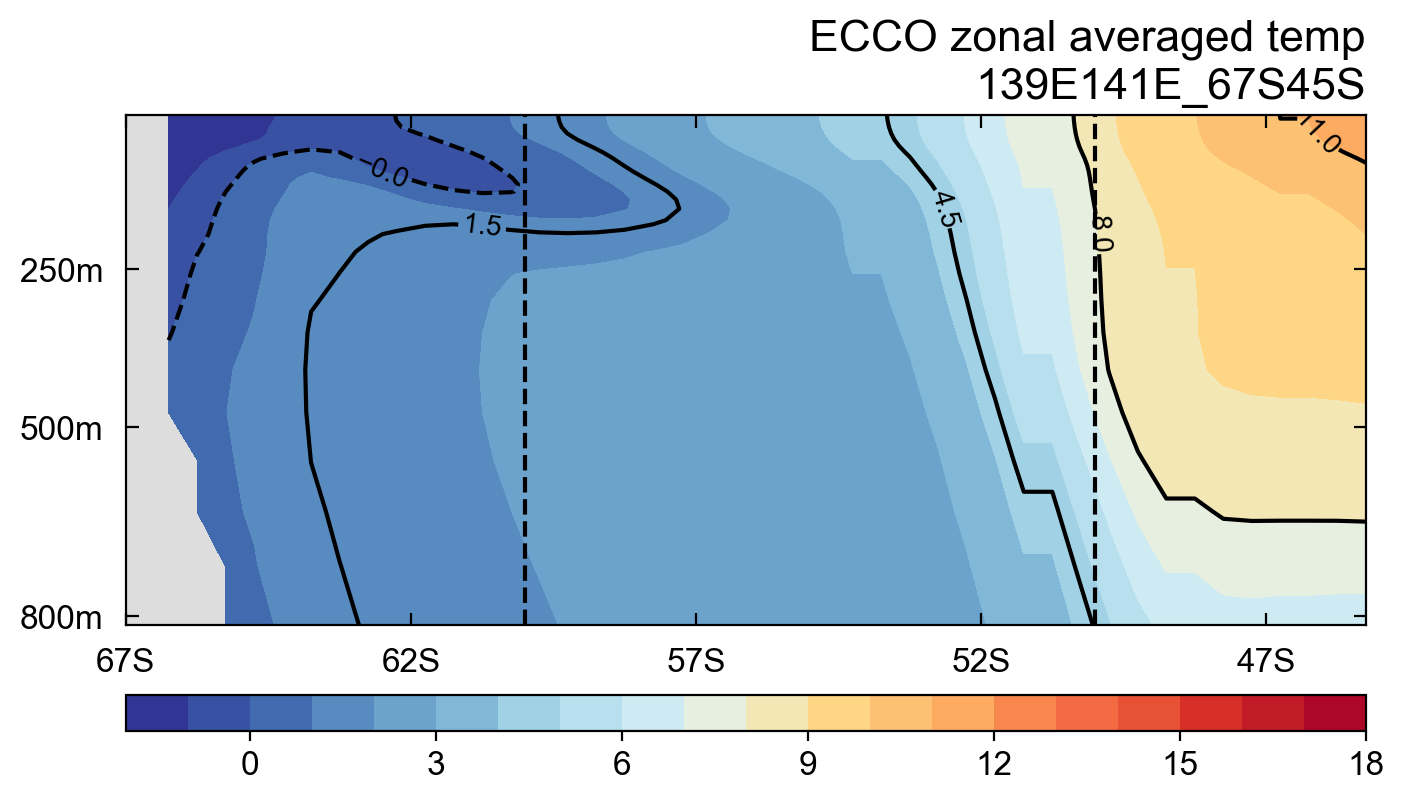

!!! Open: J:/tmp_proc/Models/myGECCO_195501_201812_ztshuv.nc !!!


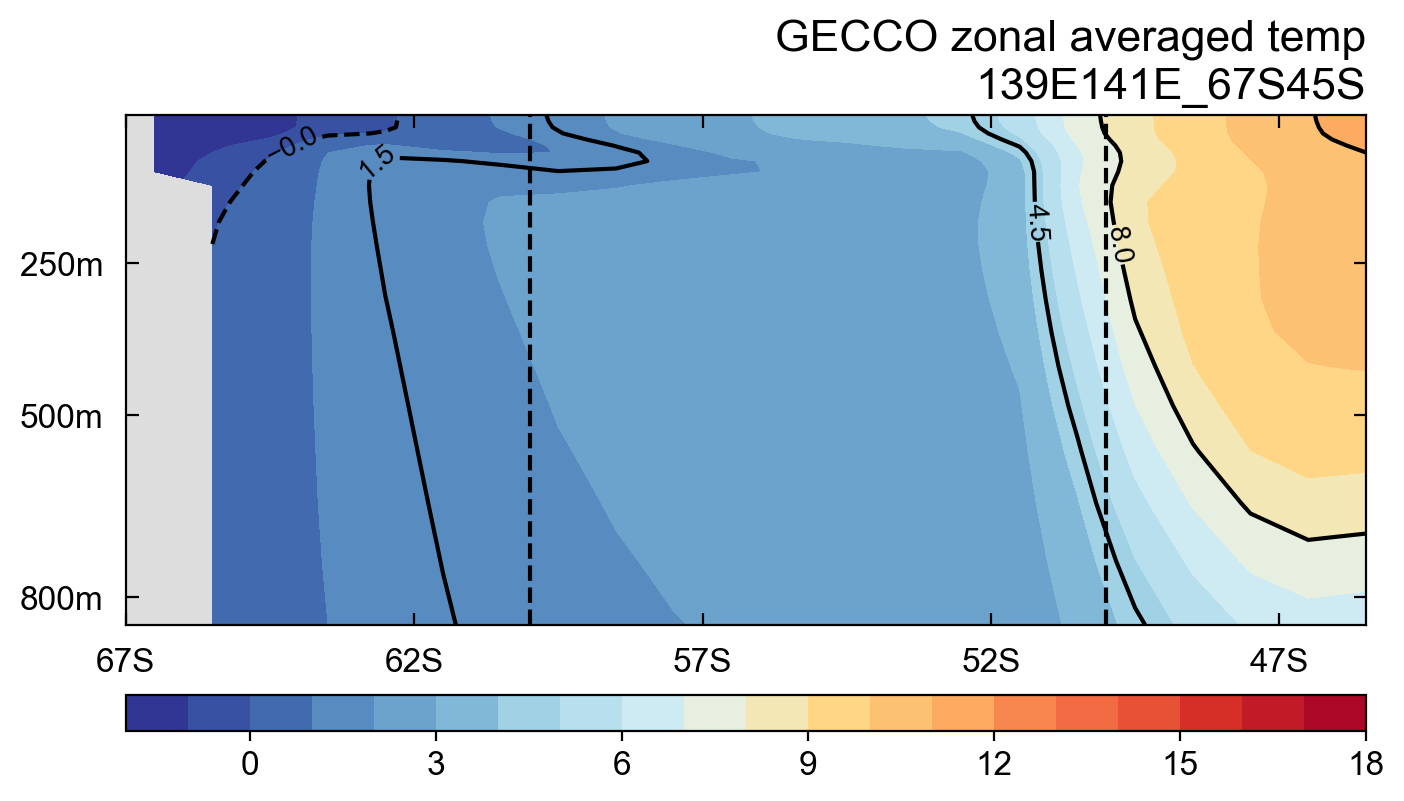

!!! Open: J:/tmp_proc/Obs/myARMOR3D_SO_199301_202312_tsh.nc !!!


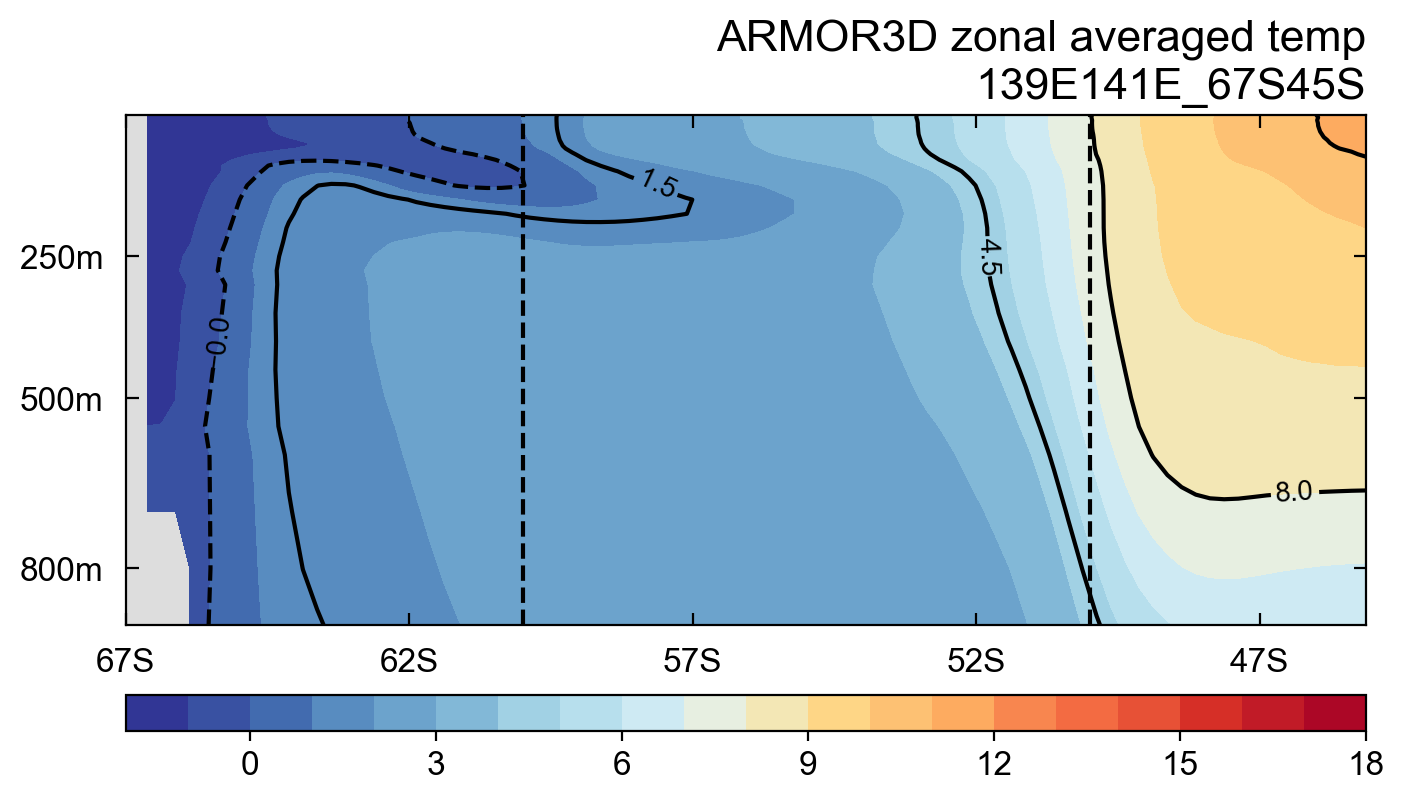

!!! Open: J:/tmp_proc/Obs/myCORA_1rg_196001_202212_tsh.nc !!!


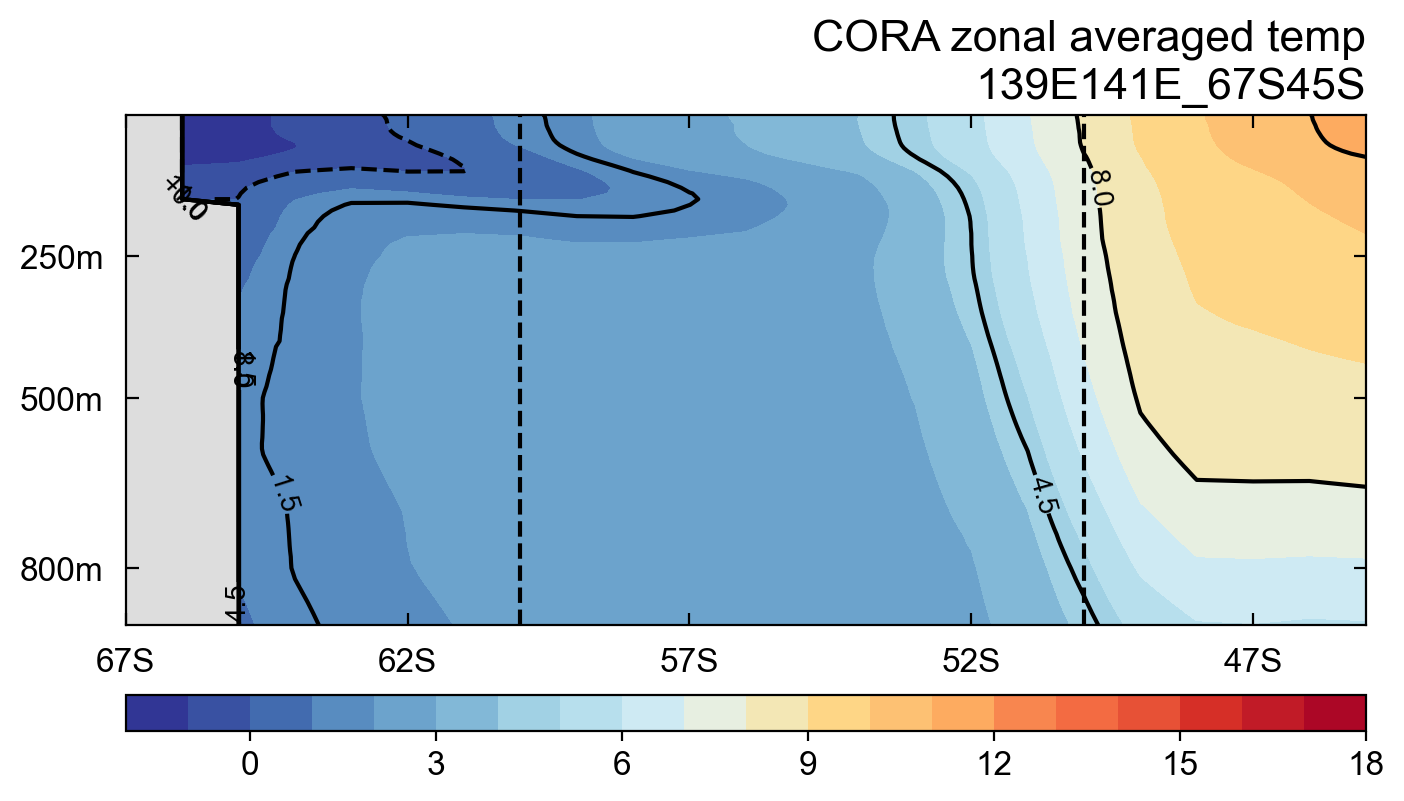

!!! Open: J:/tmp_proc/Obs/myEN4_195501_202212_tsh.nc !!!


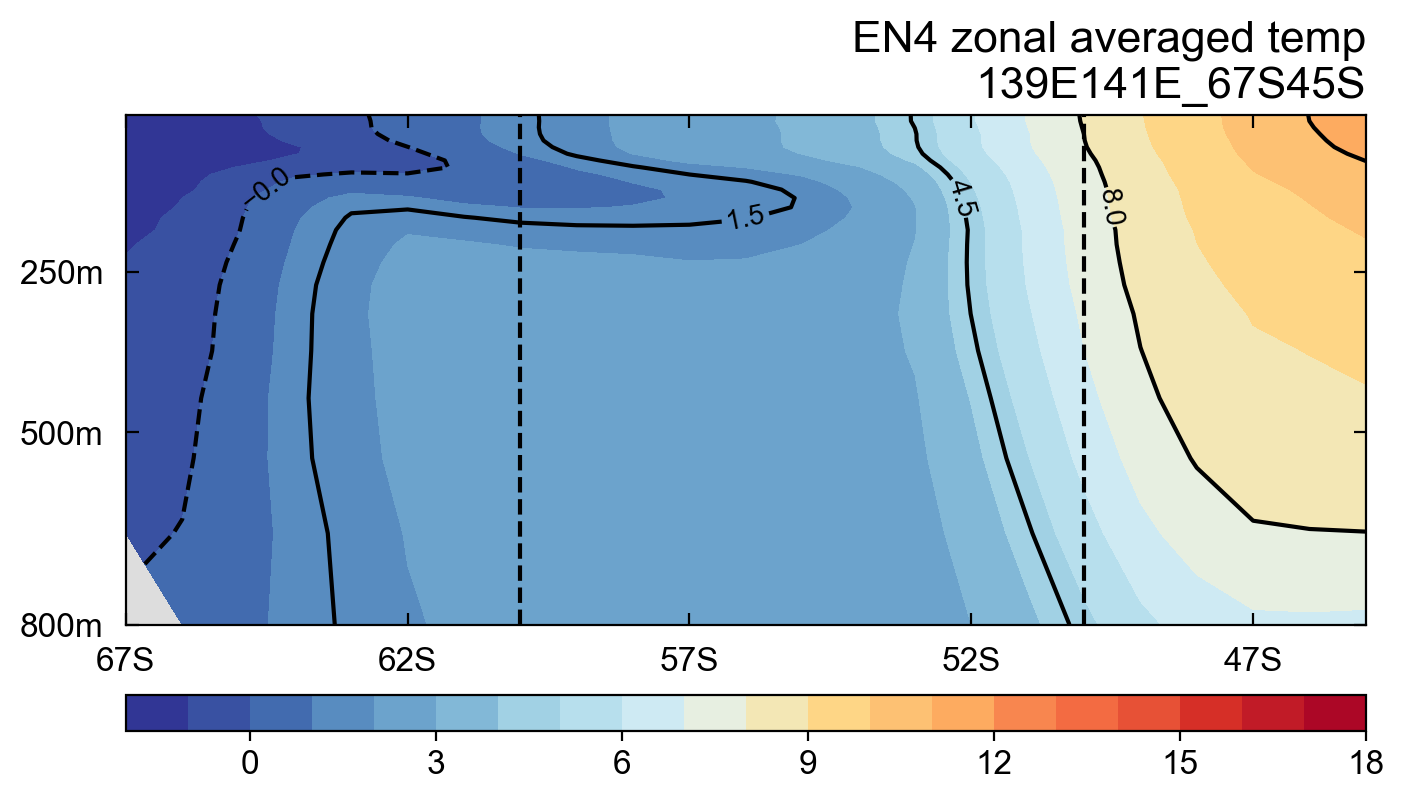

!!! Open: J:/tmp_proc/Obs/myIAP_195501_202212_tshuv.nc !!!


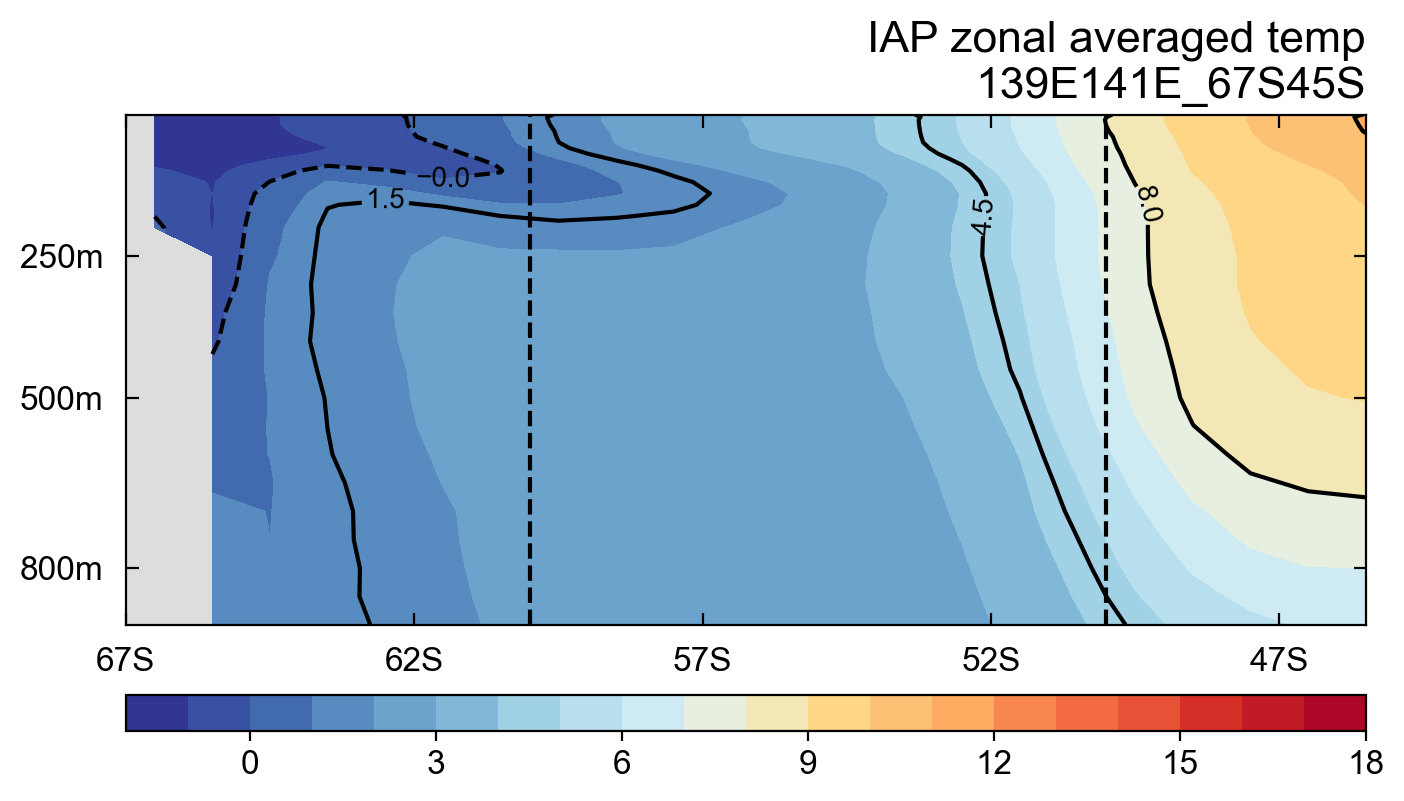

!!! Open: J:/tmp_proc/Obs/myISAS17_SO_200201_201712_tsh.nc !!!


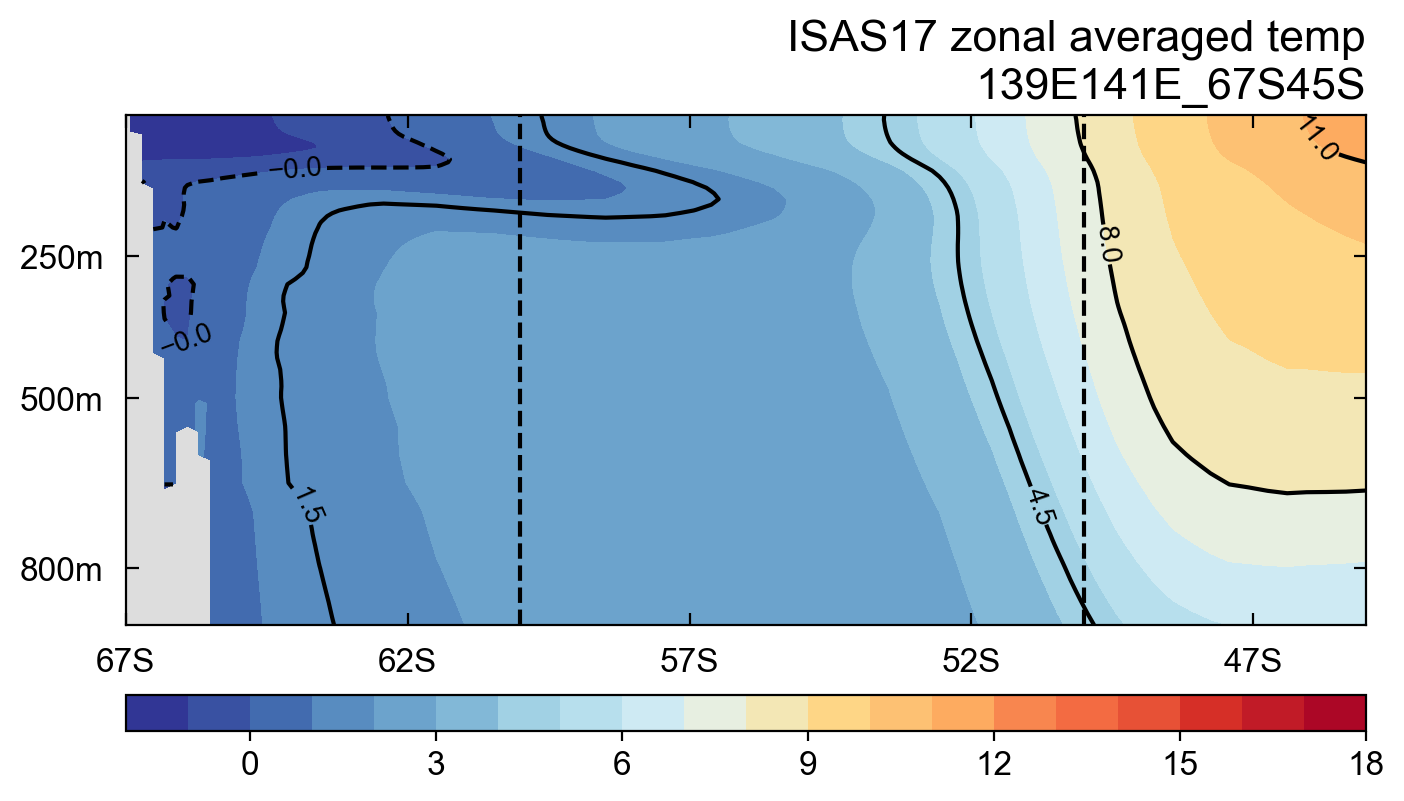

!!! Open: J:/tmp_proc/Obs/myISHII_195501_202212_tsh.nc !!!


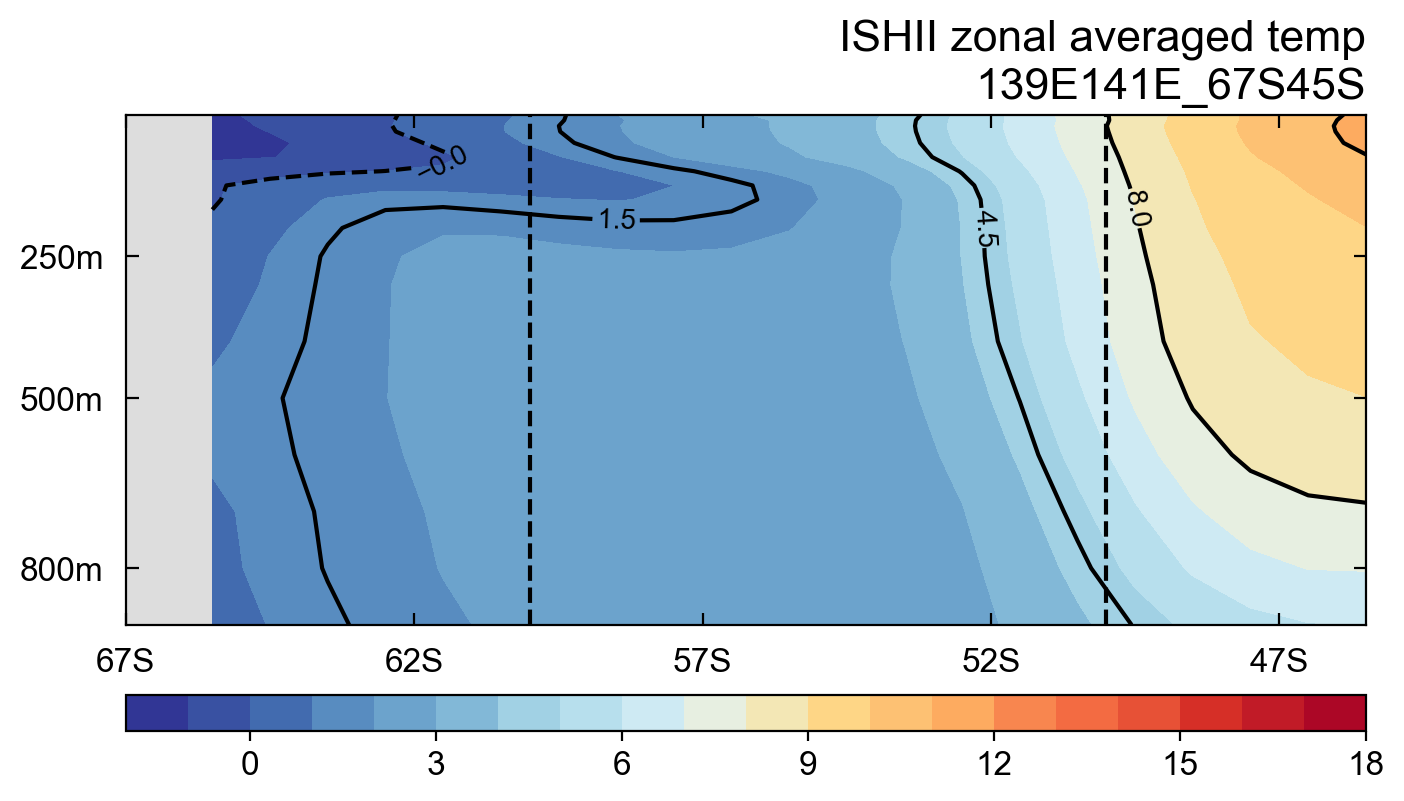

In [19]:
### Read myDATA =============================================================
for i in myDATA: 
    print('!!! Open: '+i+' !!!')
    tmp=xr.open_dataset(i)

    mydata = tmp[varnm].loc[dict(lat=slice(lat_rng[0],lat_rng[-1]),lon=slice(lon_rng[0],lon_rng[-1]),\
        time=slice(time_rng[0],time_rng[-1]),depth=slice(depth_rng[0],depth_rng[-1]))].mean(dim=['time','lon'])

    mydata=mydata.where(mydata<10**10)
    mydata=mydata.where(mydata>-10**10)
    
    latR,depthR=mydata.lat.values,mydata.depth.values
    dta_nm=i.split('/')[-1][2:-3].split('_')[0]+\
        ' zonal averaged '+varnm+'\n'+tmp_sv_nm
    dta_snm=wpth+dta_nm.replace(' ','_')

    latR_m,depthR_m=np.meshgrid(latR,depthR)
    
    CMAP,mylevel=myClrbr('b2r',mylim,myN)
    
    Vertical_data_drift03_(latR_m,-depthR_m,mydata,mydepth,CMAP,mylevel,mylevels2,dta_nm,dta_snm)

  

In [21]:
dta_snm

'ISHII_zonal_averaged_temp\n139E141E_67S45S'

In [22]:
wpth

'C:/Users/shjo/OneDrive/mySO/Sections/Mean_states/'

In [23]:
wpth_re

'C:/Users/shjo/OneDrive/mySO/Sections/Mean_states/temp_1993_2017_139E141E_67S45S/'

In [24]:
tmp_sv_nm

'139E141E_67S45S'

In [25]:
mydata

<xarray.DataArray 'temp' (depth: 18, lat: 22)>
array([[            nan, -1.14582667e+00, -8.33333334e-01,
        -4.85414666e-01, -9.75586685e-02,  3.54642667e-01,
         8.65207999e-01,  1.42236667e+00,  1.99027867e+00,
         2.49473866e+00,  2.89741867e+00,  3.22351867e+00,
         3.62354934e+00,  4.23461467e+00,  5.16892267e+00,
         6.31164934e+00,  7.44727333e+00,  8.47023200e+00,
         9.37783200e+00,  1.01380560e+01,  1.07032440e+01,
         1.11876947e+01],
       [            nan, -1.20818267e+00, -8.69589332e-01,
        -5.02469333e-01, -7.86520002e-02,  4.01677332e-01,
         9.21640000e-01,  1.45157866e+00,  1.93363333e+00,
         2.35268666e+00,  2.73576000e+00,  3.13646400e+00,
         3.64753600e+00,  4.32457732e+00,  5.20198133e+00,
         6.27627867e+00,  7.40326535e+00,  8.48596133e+00,
         9.41728668e+00,  1.01338933e+01,  1.07137840e+01,
         1.12865493e+01],
       [            nan, -1.24897467e+00, -9.10445334e-01,
        -5.11920001e-01, -6.08853324e-02,  4.38211999e-01,
         9.67531999e-01,  1.49598666e+00,  1.96664400e+00,
         2.37167333e+00,  2.74459866e+00,  3.13572533e+00,
...
         2.38416067e+00,  2.54980200e+00,  2.96440333e+00,
         3.71043799e+00,  4.74546467e+00,  5.89191200e+00,
         6.87549334e+00,  7.53049401e+00,  7.81798800e+00,
         7.90034532e+00],
       [            nan,  8.01071999e-01,  1.17444600e+00,
         1.53486267e+00,  1.81209600e+00,  2.01896200e+00,
         2.16241000e+00,  2.25261400e+00,  2.30445733e+00,
         2.32490200e+00,  2.32153400e+00,  2.31186334e+00,
         2.33530134e+00,  2.45717134e+00,  2.79834001e+00,
         3.39743066e+00,  4.26886200e+00,  5.24678533e+00,
         6.12506734e+00,  6.72937467e+00,  7.02242800e+00,
         7.05761066e+00],
       [            nan,  6.14874667e-01,  1.02742400e+00,
         1.38844800e+00,  1.68912000e+00,  1.91782333e+00,
         2.08034600e+00,  2.18671800e+00,  2.25358200e+00,
         2.29203200e+00,  2.30786734e+00,  2.31386267e+00,
         2.34391400e+00,  2.44942000e+00,  2.71096200e+00,
         3.15801666e+00,  3.81217400e+00,  4.54568400e+00,
         5.20791800e+00,  5.69206600e+00,  5.95729132e+00,
         6.02274401e+00]])
Coordinates:
  * lat      (lat) float32 -66.5 -65.5 -64.5 -63.5 ... -48.5 -47.5 -46.5 -45.5
  * depth    (depth) float32 0.0 10.0 20.0 30.0 50.0 ... 600.0 700.0 800.0 900.0